參考資料: https://mks.tw/2880/%E6%95%B8%E6%93%9A%E5%88%86%E6%9E%90-%E8%B8%8F%E4%B8%8A-kaggle-%E4%B9%8B%E8%B7%AF-%E4%BD%BF%E7%94%A8-knn-%E9%A0%90%E6%B8%AC-digit-recognizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
PATH = "/mnt/e/program/AI/Kaggle/DigitRecognizer"
train = pd.read_csv(PATH + "/data/train.csv")
test = pd.read_csv(PATH + "/data/test.csv")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [4]:
O_X_train = train.values[0:,1:]
O_y_train = train.values[0:,0]
test = test.values

In [5]:
import copy
nomalizing_X_train = copy.deepcopy(O_X_train)
nomalizing_y_train = copy.deepcopy(O_y_train)
nomalizing_X_train[nomalizing_X_train > 0] = 1
nomalizing_y_train[nomalizing_y_train > 0] = 1

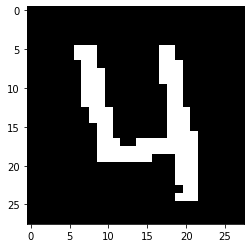

In [ ]:
plt.imshow(nomalizing_X_train[3].reshape((28,28)),cmap="gray")

In [6]:
O_X_train = np.concatenate((O_X_train,nomalizing_X_train))
O_y_train = np.concatenate((O_y_train,nomalizing_y_train))

In [7]:
x_train, x_test, y_train, y_test = train_test_split(O_X_train, O_y_train, test_size=0.2, random_state=666)

In [8]:
from sklearn.metrics import accuracy_score
import time

In [9]:
k_score = []
test_range = 10000
for k in range(1, 6 + 1):
    print(f"k = {k} Training.")
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    predict_result = knn.predict(x_test[:test_range])
    predict_score = accuracy_score(y_test[:test_range], predict_result)
    k_score.append(predict_score)
    end = time.time()
    print(f"Score: {predict_score}.")
    print(f"Complete time: {end - start} Secs.")
print(k_score)

k = 1 Training.
Score: 0.9817.
Complete time: 75.55649638175964 Secs.
k = 2 Training.
Score: 0.9762.
Complete time: 43.783968687057495 Secs.
k = 3 Training.
Score: 0.9809.
Complete time: 41.70103979110718 Secs.
k = 4 Training.
Score: 0.9808.
Complete time: 49.06849980354309 Secs.
k = 5 Training.
Score: 0.9808.
Complete time: 46.222697257995605 Secs.
k = 6 Training.
Score: 0.9805.
Complete time: 44.78239345550537 Secs.
[0.9817, 0.9762, 0.9809, 0.9808, 0.9808, 0.9805]


In [10]:
print(k_score.index(np.array(k_score).max()))
k_score = k_score.index(np.array(k_score).max()) + 1

0


In [11]:
knn = KNeighborsClassifier(n_neighbors=k_score)
knn.fit(O_X_train, O_y_train)
predict_result = knn.predict(test)
print("Train conplete.")

Train conplete.


In [12]:
df_submission = {
    "ImageId":list(range(1,28000+1)),
    "Label":list(predict_result)
}

In [13]:
df_submission = pd.DataFrame(df_submission)
with open(PATH + "/submission.csv","w") as file:
    file.write(df_submission.to_csv(index=False))

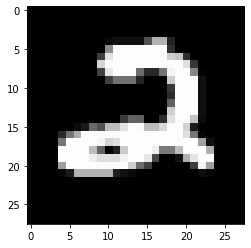

In [4]:
plt.imshow(test[0].reshape((28,28)),cmap='gray')